In [1]:
import torch
import numpy  as np
import torchvision.transforms.functional as TF
import matplotlib as mpl
import matplotlib.pyplot as plt

import utils.trigoInterpolation as trigo

## 21.12.2022:
Try trigonometric interpolation on random image

Seems to work, had to fix behaviour for even dimensions

/home/skabri/FourierImaging/utils/trigoInterpolation.py:48: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:250.)
  x_inter = fft.ifft2(fft.ifftshift(xf_pad[:,:,:new_shape[-2],:new_shape[-1]]), norm=self.norm).type(x.dtype)


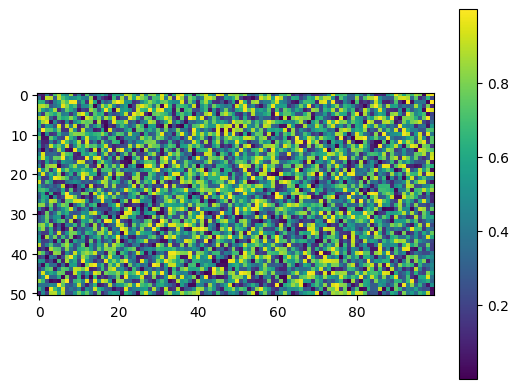

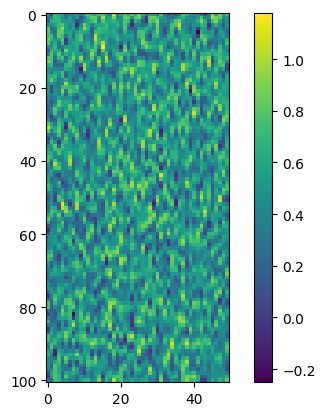

In [2]:
old = [1,1,51,100]
old_shape = [51,100]
new_shape=[101,50]
test_img = torch.rand(old)
inter_img = trigo.TrigonometricResize_2d(new_shape)(test_img)
#inter_ft, inter_ft_pad, re_inter_img = trigo.TrigonometricResize_2d(old_shape)(inter_img)

plt.figure()
plt.imshow(test_img[0,0])
plt.colorbar()

plt.figure()
plt.imshow(inter_img[0,0].real)
plt.colorbar()

# plt.figure()
# plt.imshow(re_inter_img[0,0]-test_img[0,0])
# plt.colorbar()

# plt.figure()
# plt.imshow(test_ft[0,0].abs())
# plt.colorbar()

# plt.figure()
# plt.imshow(test_ft_pad[0,0].abs())
# plt.colorbar()

# plt.figure()
# plt.imshow(inter_ft[0,0].abs())
# plt.colorbar()

# plt.figure()
# plt.imshow(inter_ft_pad[0,0].abs())
# plt.colorbar()

## 23.12.2022
Christmas Tree

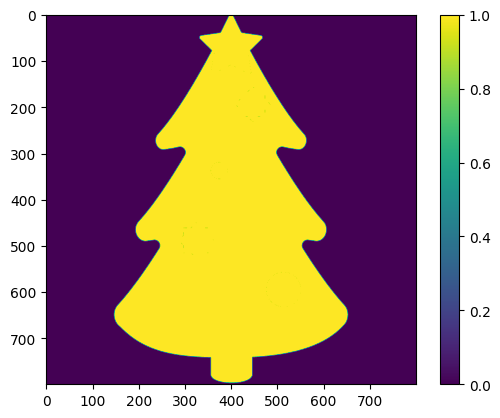

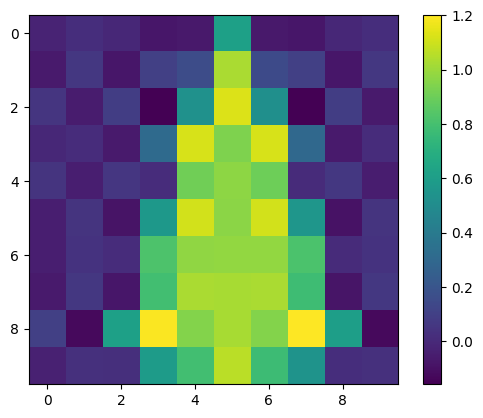

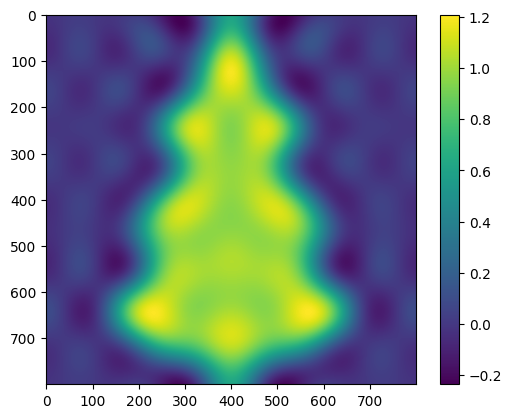

In [15]:
img = plt.imread('baum.png')[:,:,3] #first try only using alpha channel
old_shape = img.shape
new_shape = [10,10]
torch_img = torch.zeros(1,1,old_shape[-2],old_shape[-1])
torch_img[0,0] = torch.tensor(img)
plt.figure()
plt.imshow(torch_img[0,0])
plt.colorbar()

# downsampling the original image
small_img = trigo.TrigonometricResize_2d(new_shape)(torch_img)
plt.figure()
plt.imshow(small_img[0,0])
plt.colorbar()

# upsampling the original image
big_img = trigo.TrigonometricResize_2d(old_shape)(small_img)
plt.figure()
plt.imshow(big_img[0,0])
plt.colorbar()

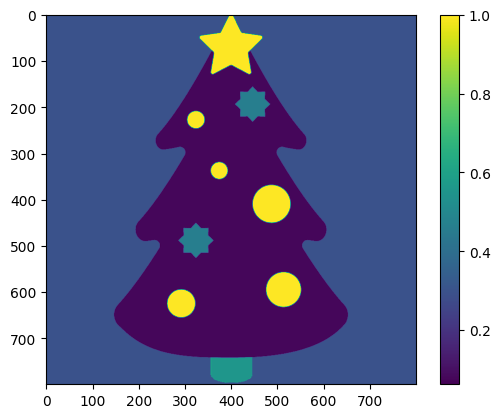

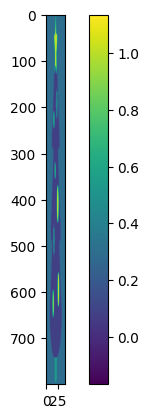

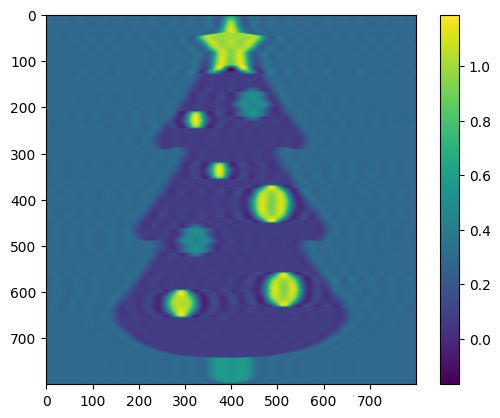

In [29]:
img = plt.imread('baum.png')[:,:,:3] #three channels
old_shape = img.shape[:2]
new_shape = [800,40]
torch_img = torch.zeros(1,3,old_shape[0],old_shape[1])
torch_img[0] = torch.tensor(img.transpose(2,0,1))
plt.figure()
plt.imshow(torch_img[0,0])
plt.colorbar()

# downsampling the original image
small_img = trigo.TrigonometricResize_2d(new_shape)(torch_img)
plt.figure()
plt.imshow(small_img[0,0])
plt.colorbar()

# upsampling the original image
big_img = trigo.TrigonometricResize_2d(old_shape)(small_img)
plt.figure()
plt.imshow(big_img[0,0])
plt.colorbar()